# Quantum Computing with Qiskit — Hands‑On Notebook

Welcome! This notebook takes you from **zero to running real quantum code** with Qiskit.
It mixes short explanations with runnable code cells and plots.

**What you'll learn:**
- Install and import the modern Qiskit stack
- Build and visualize circuits
- Prepare states, measure, and interpret statistics
- Use common single- and multi-qubit gates
- Implement classic algorithms (Deutsch–Jozsa, Grover, QFT)
- (Optional) Connect to IBM Quantum hardware

> This notebook follows the **modern Qiskit packaging** (2024+):
> - `qiskit_aer` for simulators
> - `backend.run(...)` instead of `execute(...)`
> - (Optional) `qiskit-ibm-runtime` for IBM Quantum access


## 1. Installation

Run the next cell **once** to install the necessary packages (skip if you already have them).


In [ ]:
# If needed, uncomment and run these lines in your environment:
# !pip install -U qiskit qiskit-aer matplotlib
# Optional for IBM Quantum access:
# !pip install -U qiskit-ibm-runtime


## 2. Imports and Version Check

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

# Optional: show Qiskit component versions
import qiskit
print("Qiskit components:", getattr(qiskit, "__qiskit_version__", "unknown"))

Qiskit components: unknown


## 3. Quantum vs Classical — Quick Primer

- **Bits vs Qubits:** Bits are `0` or `1`. Qubits can be in **superposition**: \(|\psi\rangle = \alpha|0\rangle + \beta|1\rangle\).
- **Entanglement:** Multi-qubit states can have correlations impossible in classical systems.
- **Measurement:** Collapses a state to a classical outcome with probabilities given by squared amplitudes.


## 4. Your First Circuit — Superposition and Measurement

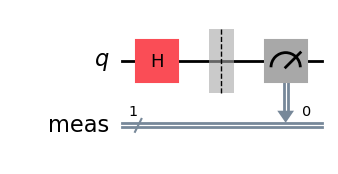

In [ ]:
# Create a 1-qubit circuit that makes a superposition and measures it
from qiskit import QuantumCircuit
from qiskit_aer import Aer

qc = QuantumCircuit(1)
qc.h(0)          # Hadamard -> (|0> + |1>)/sqrt(2)
qc.measure_all() # Measure

# Visualize the circuit (requires matplotlib)
qc.draw('mpl')

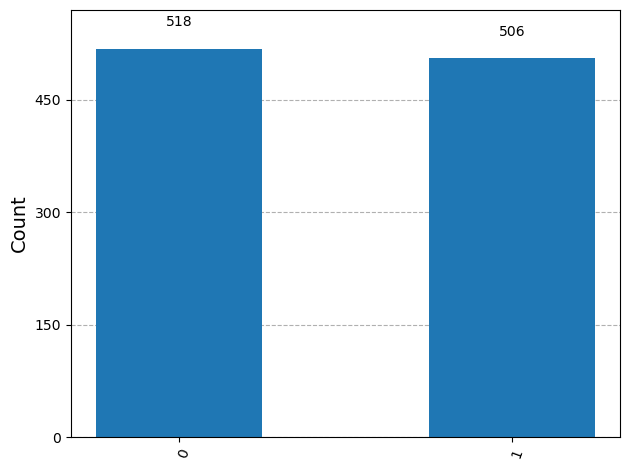

In [5]:
# Run on the QASM simulator and view histogram of outcomes
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## 5. Custom State Initialization

You can directly initialize a qubit to any normalized state vector, e.g. \( (|0\rangle + |1\rangle)/\sqrt{2} \).


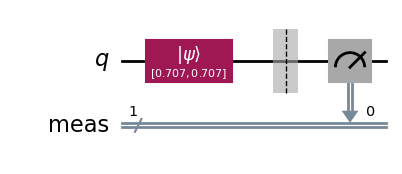

In [8]:
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]  # α|0> + β|1>, with α=β=1/√2

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.measure_all()
qc.draw('mpl')





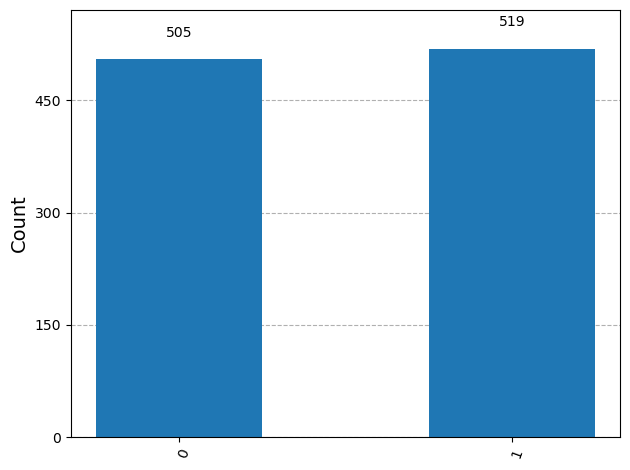

In [9]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## 6. Single‑Qubit Gates — X, Y, Z, H, S, T

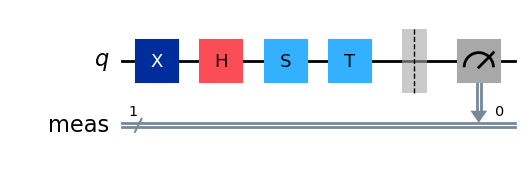

In [10]:
qc = QuantumCircuit(1)
qc.x(0)  # NOT
qc.h(0)  # Hadamard
qc.s(0)  # Phase (π/2)
qc.t(0)  # Phase (π/4)
qc.measure_all()
qc.draw('mpl')

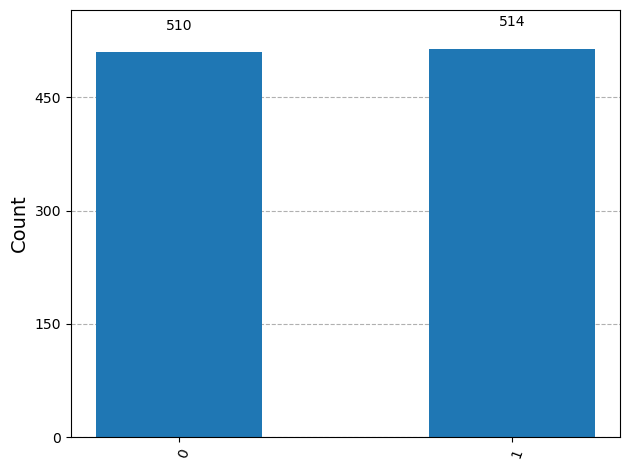

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)

## 7. Multi‑Qubit Gates — CNOT, SWAP, Toffoli — and Entanglement

Create a Bell state using H + CNOT and observe ~50/50 correlation in outcomes.


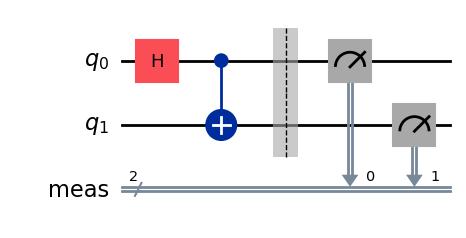

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)   # Entangle
qc.measure_all()
qc.draw('mpl')

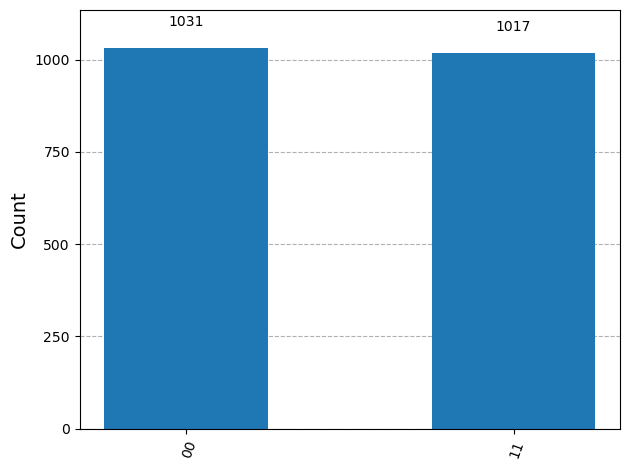

In [13]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=2048)
counts = job.result().get_counts()
plot_histogram(counts)  # Expect mostly '00' and '11'

## 8. Controlled Operations and Toffoli (CCX)

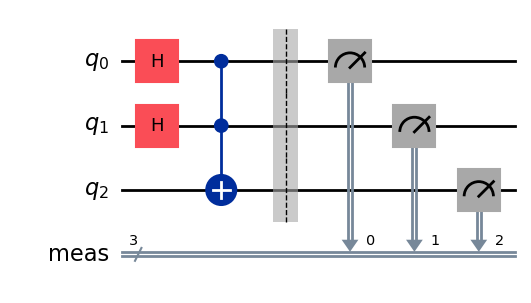

In [14]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.ccx(0, 1, 2)  # Toffoli: flips qubit 2 only if 0 and 1 are |1>
qc.measure_all()
qc.draw('mpl')

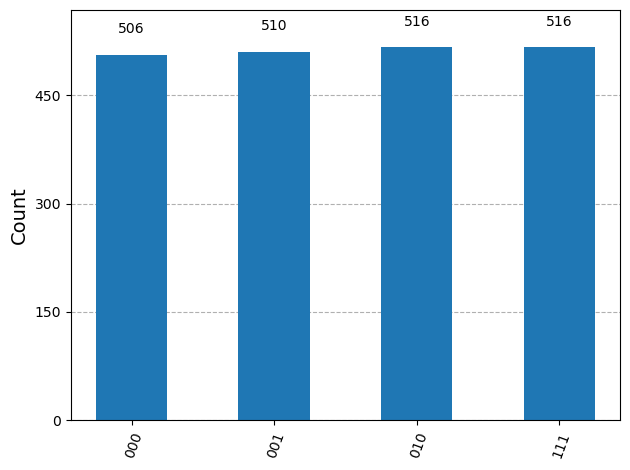

In [15]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(qc, shots=2048).result().get_counts()
plot_histogram(counts)

## 9. Algorithm: Deutsch–Jozsa (Balanced vs Constant)

Detect if a promised function is constant or balanced using a single oracle call.


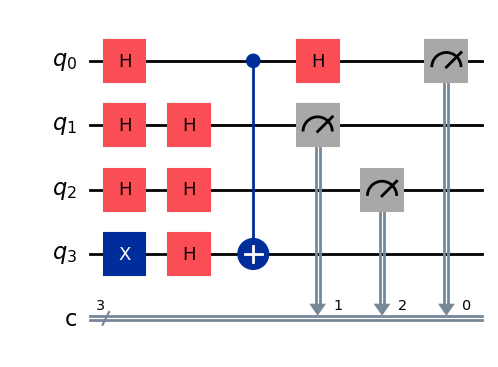

In [16]:
from qiskit import QuantumCircuit

n = 3                         # number of input qubits
qc = QuantumCircuit(n+1, n)   # +1 output qubit
qc.x(n)                       # set output to |1>
qc.h(range(n+1))              # Hadamards

# Example balanced oracle: flip output if x0 == 1
qc.cx(0, n)

# Interference step
qc.h(range(n))
qc.measure(range(n), range(n))
qc.draw('mpl')

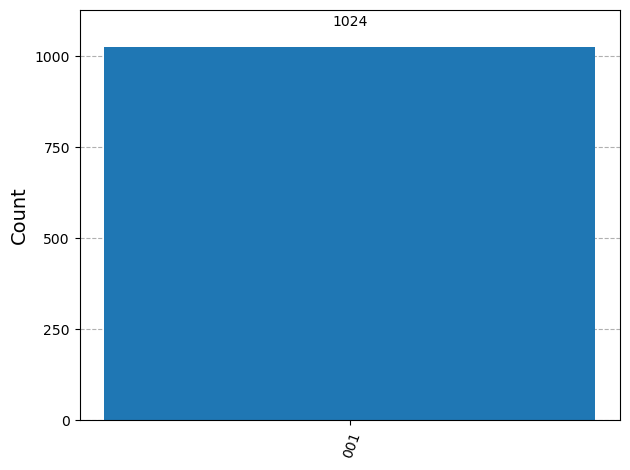

In [17]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(qc, shots=1024).result().get_counts()
plot_histogram(counts)  # If constant -> '000'; balanced -> anything else

## 10. Algorithm: Grover’s Search (Tiny Example)

Mark a single solution in a 3‑qubit space and amplify its probability.


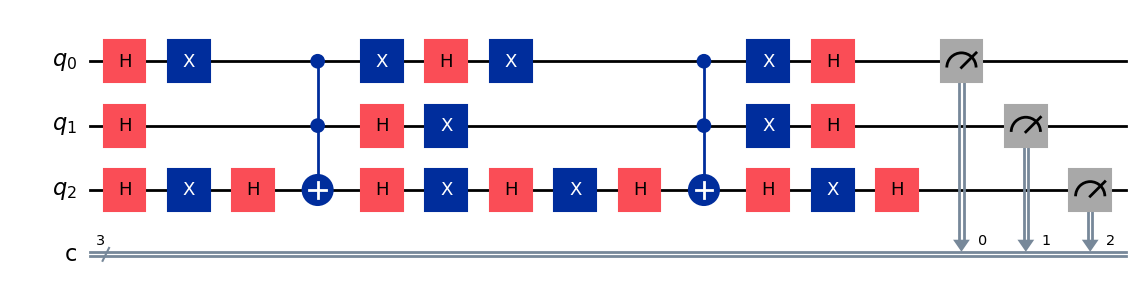

In [18]:
from qiskit import QuantumCircuit

def oracle_mark_101():
    o = QuantumCircuit(3)
    # Mark |101>: flip phase of |101>
    o.x(0); o.x(2)
    o.h(2); o.ccx(0,1,2); o.h(2)
    o.x(0); o.x(2)
    return o

def diffusion():
    d = QuantumCircuit(3)
    d.h(range(3))
    d.x(range(3))
    d.h(2); d.ccx(0,1,2); d.h(2)
    d.x(range(3))
    d.h(range(3))
    return d

qc = QuantumCircuit(3, 3)
qc.h(range(3))           # uniform superposition
qc.compose(oracle_mark_101(), inplace=True)
qc.compose(diffusion(), inplace=True)
qc.measure(range(3), range(3))
qc.draw('mpl')

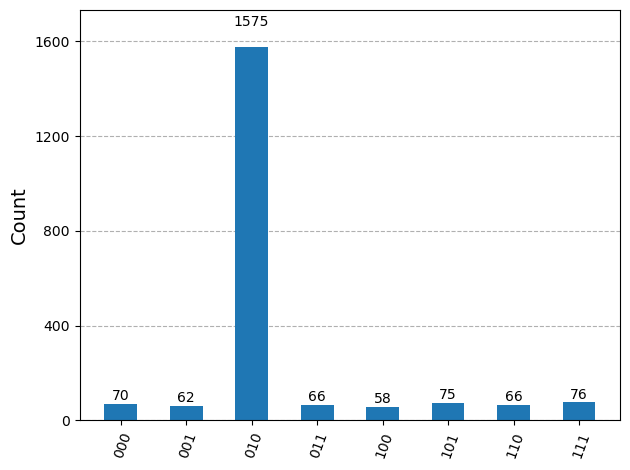

In [19]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(qc, shots=2048).result().get_counts()
plot_histogram(counts)   # Peak near '101'

## 11. Quantum Fourier Transform (QFT) — Helper Circuit

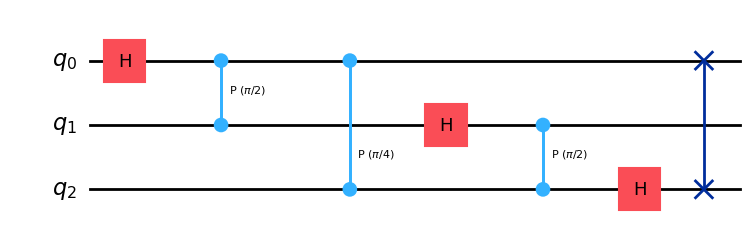

In [20]:
from qiskit import QuantumCircuit
import numpy as np

def qft(n):
    qc = QuantumCircuit(n)
    for j in range(n):
        qc.h(j)
        for k in range(j+1, n):
            qc.cp(np.pi / 2**(k-j), k, j)
    # bit-reversal (swap) for readability
    for i in range(n//2):
        qc.swap(i, n-1-i)
    return qc

qft_circ = qft(3)
qft_circ.draw('mpl')

## 12. (Optional) Run on IBM Quantum Hardware — Modern Runtime API

To use real devices, install and configure the runtime client:

```python
# !pip install -U qiskit-ibm-runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# 1) Save your account once (replace with your token)
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="YOUR_API_TOKEN", overwrite=True)

# 2) Load service and pick a backend
# service = QiskitRuntimeService()
# backend = service.backend("ibm_oslo")  # example backend name

# 3) Submit a job with the Sampler primitive
# qc = QuantumCircuit(1); qc.h(0); qc.measure_all()
# sampler = Sampler(backend=backend)
# job = sampler.run(circuits=qc, shots=1024)
# print(job.result().quasi_dists)
```

> Tip: check your available backends and queue times in the IBM Quantum Platform web UI.


## 13. Appendix — Troubleshooting (2024+)

- **`cannot import name 'Aer' from 'qiskit'`** → Install and import `qiskit-aer` and use `from qiskit_aer import Aer`.
- **`cannot import name 'execute' from 'qiskit'`** → Use `backend.run(...)` or `from qiskit.execute_function import execute`.
- **Matplotlib not found** → `pip install matplotlib` and restart kernel.
- **Package version check**:
```python
import qiskit; print(getattr(qiskit, "__qiskit_version__", "unknown"))
```
